In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from sklearn.metrics import confusion_matrix


In [24]:
# Load the Movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')
# Sample a trainset and a testset
trainset, testset = train_test_split(data, test_size=0.25)

  user_id item_id  rating
0      41     414     4.0
1     529     682     4.0
2     371     504     4.0
3     661      70     4.0
4     197     347     4.0


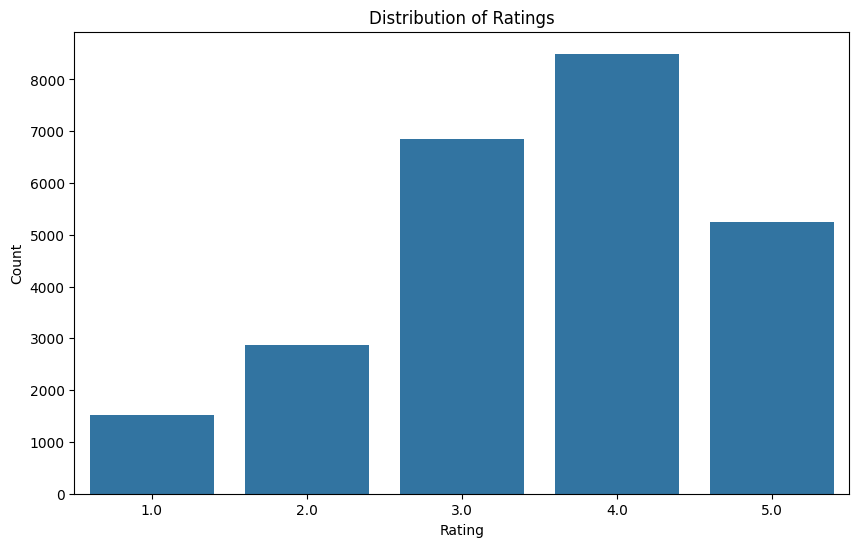

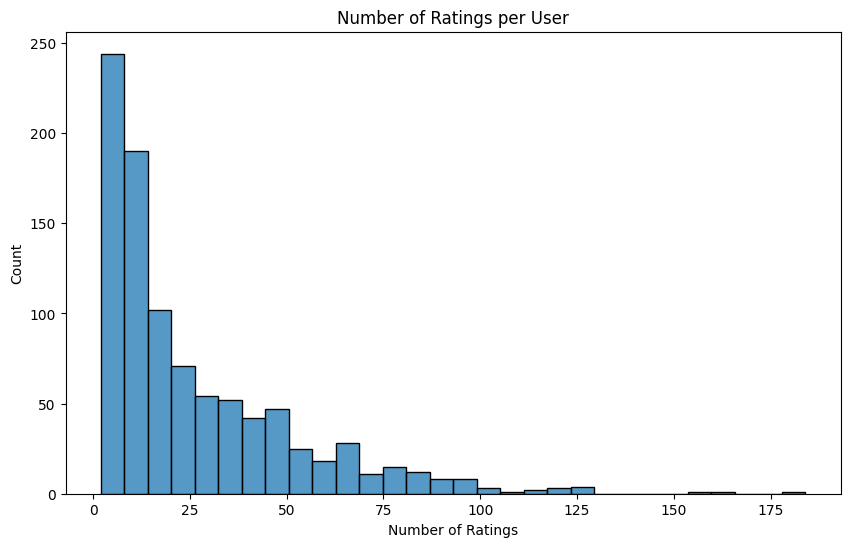

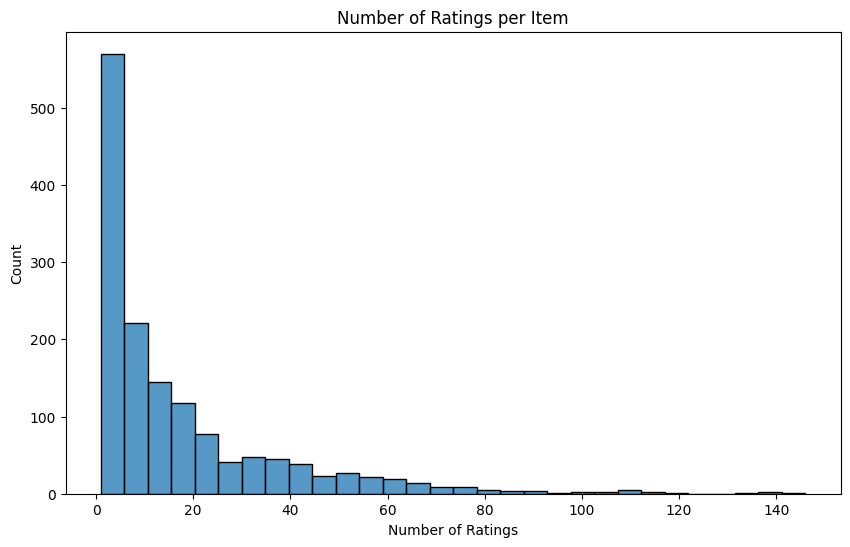

In [25]:
# Convert the testset to a pandas DataFrame
df = pd.DataFrame(testset, columns=['user_id', 'item_id', 'rating'])

# Display the first few rows of the DataFrame
print(df.head())

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot the number of ratings per user
ratings_per_user = df.groupby('user_id').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=30, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

# Plot the number of ratings per item
ratings_per_item = df.groupby('item_id').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_item, bins=30, kde=False)
plt.title('Number of Ratings per Item')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

In [26]:
# Use the famous SVD algorithm.
algo = SVD()
# Train the algorithm on the trainset
algo.fit(trainset)

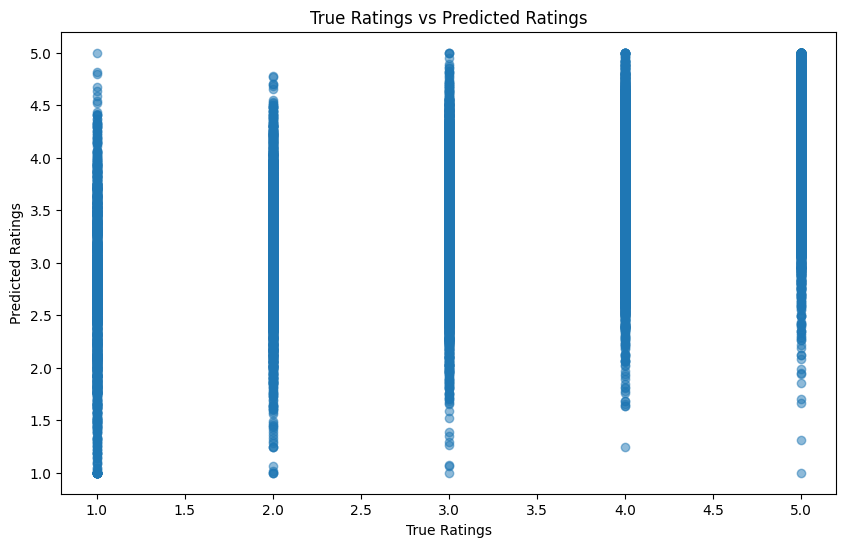

In [ ]:
# Extract true ratings and predicted ratings
true_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(true_ratings, predicted_ratings, alpha=0.5)
plt.title('True Ratings vs Predicted Ratings')
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [28]:
# Predict ratings for the testset
predictions = algo.test(testset)

# Evaluate the accuracy of the algorithm
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.9356


0.9355813475722444

In [29]:
# Get Root Mean Squared Error (RMSE)
accuracy.rmse(predictions)

# Get Mean Absolute Error (MAE)
accuracy.mae(predictions)

RMSE: 0.9356
MAE:  0.7361


0.7361112516704372

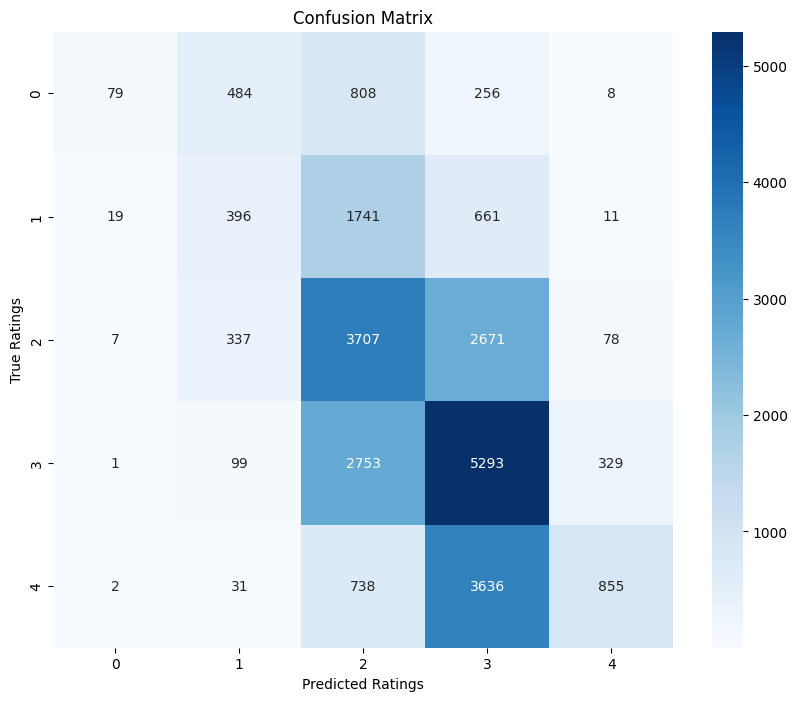

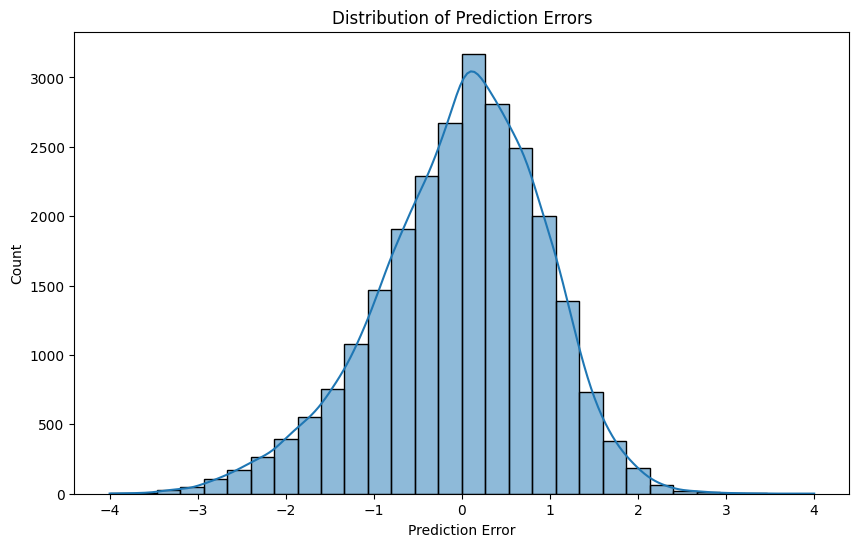

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(true_ratings, [round(pred) for pred in predicted_ratings])

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Ratings')
plt.ylabel('True Ratings')
plt.show()

# Plot the distribution of prediction errors
errors = [true - pred for true, pred in zip(true_ratings, predicted_ratings)]
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()

In [ ]:
# Add new users and their ratings
new_ratings = [
    ('1001', '1', 5.0),
    ('1001', '50', 4.0),
    ('1002', '1', 3.0),
    ('1002', '56', 2.0),
    ('1003', '1', 4.0),
    ('1003', '100', 5.0),
    ('1004', '1', 2.0),
    ('1004', '300', 3.0),
    ('1005', '1', 4.0),
    ('1005', '500', 5.0)
]

# Add new ratings to the existing testset
updated_testset = testset + new_ratings

# Predict ratings for the updated testset
updated_predictions = algo.test(updated_testset)

# Recommend a movie for each new user
new_user_ids = ['1001', '1002', '1003', '1004', '1005']
recommendations = {}

for user_id in new_user_ids:
    user_predictions = [pred for pred in updated_predictions if pred.uid == user_id]
    user_predictions.sort(key=lambda x: x.est, reverse=True)
    top_movie = user_predictions[0].iid
    recommendations[user_id] = top_movie

# Load the movie names
movie_names = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', sep='|', encoding='latin-1', usecols=[0, 1], names=['item_id', 'title'], index_col='item_id')

# Print the names of the recommended movies
print("Recommendations for new users:")
for user_id, movie_id in recommendations.items():
    print(f"User {user_id} is recommended movie '{movie_names.loc[int(movie_id), 'title']}'")

Recommendations for new users:
User 1001 is recommended movie 'Star Wars (1977)'
User 1002 is recommended movie 'Pulp Fiction (1994)'
User 1003 is recommended movie 'Fargo (1996)'
User 1004 is recommended movie 'Toy Story (1995)'
User 1005 is recommended movie 'Fly Away Home (1996)'


In [35]:
from surprise import KNNBasic

# Use the KNNBasic algorithm.
knn_algo = KNNBasic()

# Train the algorithm on the trainset
knn_algo.fit(trainset)

# Predict ratings for the testset
knn_predictions = knn_algo.test(testset)

# Extract true ratings and predicted ratings
knn_true_ratings = [pred.r_ui for pred in knn_predictions]
knn_predicted_ratings = [pred.est for pred in knn_predictions]

# Evaluate the accuracy of the algorithm
knn_rmse = accuracy.rmse(knn_predictions)
knn_mae = accuracy.mae(knn_predictions)

# Print RMSE and MAE
print(f'KNN RMSE: {knn_rmse}')
print(f'KNN MAE: {knn_mae}')

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9814
MAE:  0.7714
KNN RMSE: 0.981428875151892
KNN MAE: 0.771353440000586


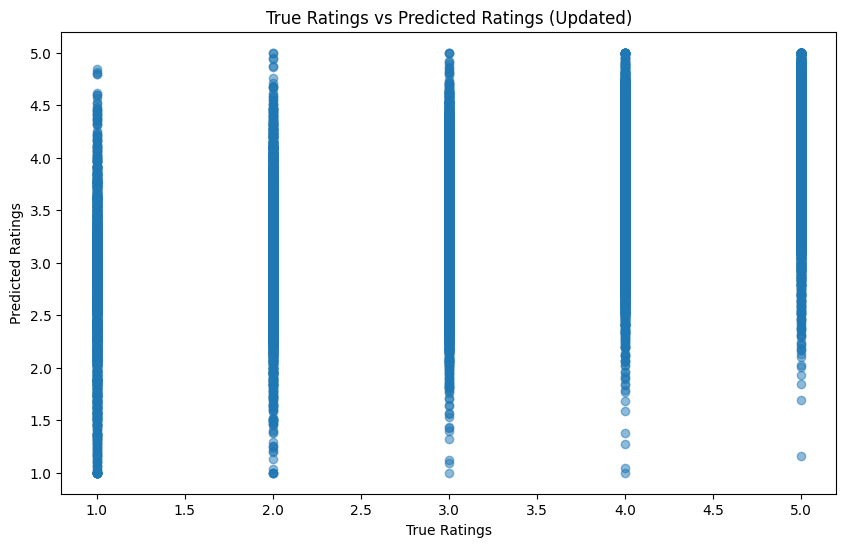

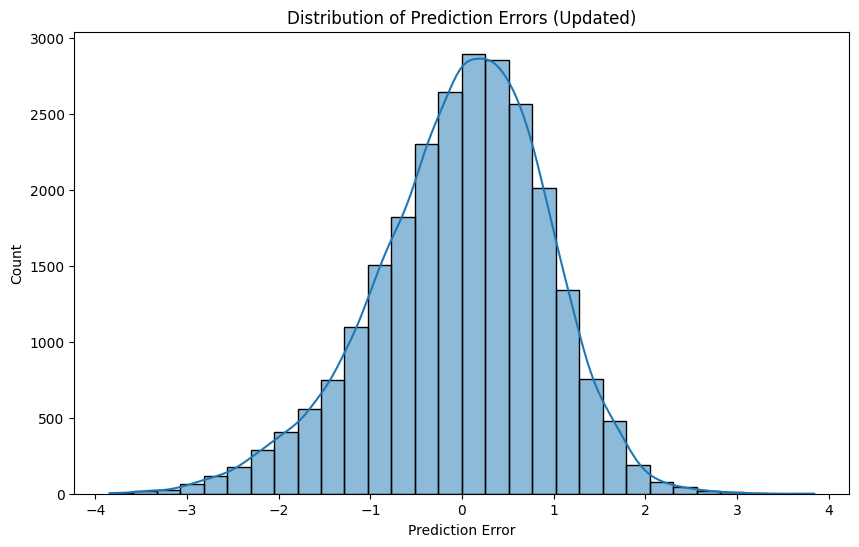

In [33]:
# Extract true ratings and predicted ratings for the updated predictions
updated_true_ratings = [pred.r_ui for pred in updated_predictions]
updated_predicted_ratings = [pred.est for pred in updated_predictions]

# Create a scatter plot for the updated predictions
plt.figure(figsize=(10, 6))
plt.scatter(updated_true_ratings, updated_predicted_ratings, alpha=0.5)
plt.title('True Ratings vs Predicted Ratings (Updated)')
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Calculate the prediction errors for the updated predictions
updated_errors = [true - pred for true, pred in zip(updated_true_ratings, updated_predicted_ratings)]

# Plot the distribution of prediction errors for the updated predictions
plt.figure(figsize=(10, 6))
sns.histplot(updated_errors, bins=30, kde=True)
plt.title('Distribution of Prediction Errors (Updated)')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()

In [34]:
# Add the same new users and their ratings to the updated testset
updated_testset_with_new = updated_testset + new_ratings

# Predict ratings for the updated testset with new users
updated_predictions_with_new = algo.test(updated_testset_with_new)

# Recommend a movie for each new user
recommendations_with_new = {}

for user_id in new_user_ids:
    user_predictions = [pred for pred in updated_predictions_with_new if pred.uid == user_id]
    user_predictions.sort(key=lambda x: x.est, reverse=True)
    top_movie = user_predictions[0].iid
    recommendations_with_new[user_id] = top_movie

# Print the names of the recommended movies for the new users
print("Recommendations for new users (with new ratings):")
for user_id, movie_id in recommendations_with_new.items():
    print(f"User {user_id} is recommended movie '{movie_names.loc[int(movie_id), 'title']}'")

Recommendations for new users (with new ratings):
User 1001 is recommended movie 'Star Wars (1977)'
User 1002 is recommended movie 'Pulp Fiction (1994)'
User 1003 is recommended movie 'Fargo (1996)'
User 1004 is recommended movie 'Toy Story (1995)'
User 1005 is recommended movie 'Fly Away Home (1996)'
